# EPS - CA 1
## Necessary Imports:
In this project, we are going to use `numpy` and `scipy.stats` for computational work, and `matplotlib.pyplot` for visualizing our workd with plots and histograms.

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.stats import poisson, binom, norm
import math

## Q1
The goal of this question is to compare expection and variance in action and in theory. Let's start by comparing `E[X]` in action and theory for a `Bin(500, p)` distribution where `0 <= p <= 1` with `step = 0.01`:

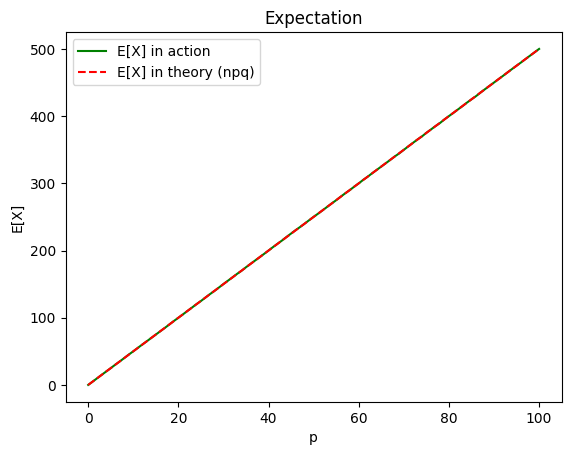

In [2]:
n = 500
m = 5000
exp_in_action = []
exp_in_theory = []
for p in range(101):
    p /= 100
    test = np.reshape(np.array(np.random.choice(2, n * m, p=[1 - p, p])), (m, n))
    exp_in_action.append(np.sum(test) / m)
    exp_in_theory.append(n * p)

plt.title("Expectation")
plt.xlabel("p")
plt.ylabel("E[X]")
plt.plot(range(101), exp_in_action, color="green", label="E[X] in action")
plt.plot(range(101), exp_in_theory, color="red", label="E[X] in theory (npq)", linestyle='--')
plt.legend()
plt.show()

As you can see, when `m` is big, the expectation in theory and in action are exactly the same.
Now let's get to their variances:

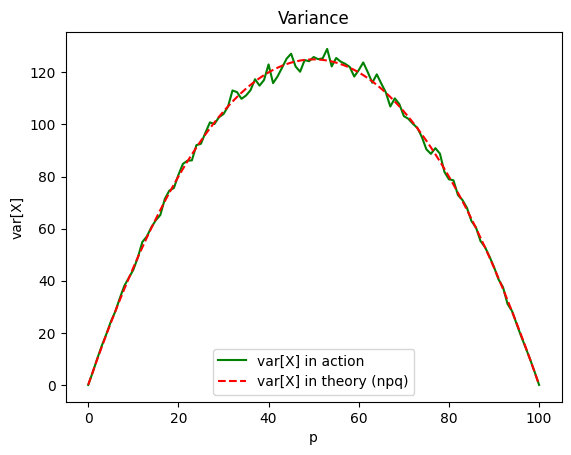

In [3]:
var_in_action = []
var_in_theory = []
for p in range(101):
    p /= 100
    test = np.reshape(np.array(np.random.choice(2, n * m, p=[1 - p, p])), (m, n))
    var_in_action.append(np.var(np.sum(test, axis=1)))
    var_in_theory.append(n * p * (1 - p))


plt.title("Variance")
plt.xlabel("p")
plt.ylabel("var[X]")
plt.plot(range(101), var_in_action, color="green", label="var[X] in action")
plt.plot(range(101), var_in_theory, color="red", label="var[X] in theory (npq)", linestyle='--')
plt.legend()
plt.show()

As you can see, the green plot gets out of expected variance plot near `p = 0.5`. Let's see why.

When `p` is near `0.5`, the chance of success times being close to expectation increases **AND ALSO** the chance of the date spreading out and getting further from expectation gets more, so the variance oscillates around expectation.
## Q2
Let's define some functions to draw normal, poisson and binomial plots/histograms with their paramteres:

In [4]:
def draw_norm(mu, sigma, only_positive = False):
    x = np.arange(0 if only_positive else mu - 3 * sigma, mu + 3 * sigma, 0.01)
    y = 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(- (x - mu)**2 / (2 * sigma**2))
    plt.plot(x, y, color="green", label="X ~ N({}, {:.2f})".format(mu, sigma))    

def draw_pois(lamb, l = 0, r = 9):
    x = np.arange(l, r, 1)
    y = poisson.pmf(x, lamb)
    plt.plot(x, y, color="red", label="X ~ Poi({})".format(lamb))

def draw_bin(n, p):
    x = np.arange(binom.ppf(0.01, n, p), binom.ppf(0.99, n, p))
    plt.plot(x, binom.pmf(x, n, p), color="orange", ms=8, label='X ~ Bin({}, {})'.format(n, p), linestyle='--')

def draw_random_bin(n, p, size):
    data = np.random.binomial(n, p, size)
    num_bins = 50
    counts, bins = np.histogram(data, bins=num_bins)
    bins = bins[:-1] + (bins[1] - bins[0])/2
    probs = counts/float(counts.sum())
    plt.bar(bins, probs, 1.0/num_bins, color="blue", label="Randomized Bin({}, {})".format(n, p))

Now we'll call these functions to see and compare normal and poisson distribution over binomal samples to see which one is a better prediction:

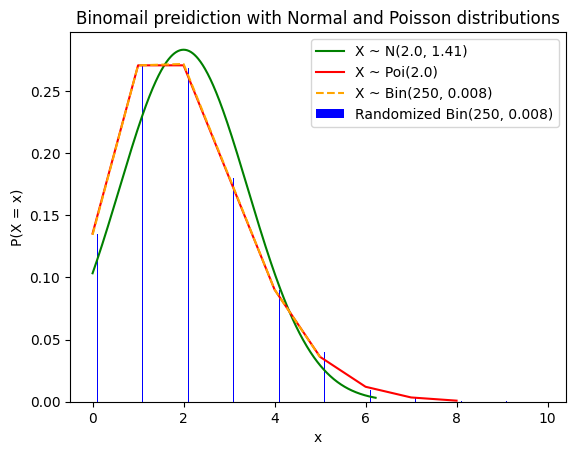

In [5]:
n = 250
p = 0.008
m = 5000
draw_norm(n * p, math.sqrt(n * p * (1 - p)), only_positive=True)
draw_pois(n * p)
draw_bin(n, p)
draw_random_bin(n, p, m)

plt.title("Binomail preidiction with Normal and Poisson distributions")
plt.xlabel("x")
plt.ylabel("P(X = x)")
plt.legend()
plt.show()

As you can see, because `p` is close to `0` (and not to `0.5`), Poisson predition is better and more accurate than normal prediction.
If `p` was around `0.5`, then normal distribution would be a much better option (as we'll see in Q4)
## Q3
In this question, we're gonna need to find `x` where `norm.cdf(x) = k` (`k` is known). For that, I've written a function that uses binary search to find x with accuracy of `0.5`:

In [6]:
def norm_cdf_bs(mu, sigma, cdf):
    l, r = 0, mu + 2000
    while (r - l > 0.5):
        mid = (l + r) / 2
        if (norm.cdf((mid - mu) / sigma) > cdf):
            r = mid
        else:
            l = mid
    return (r + l) / 2

And answer the question easily:

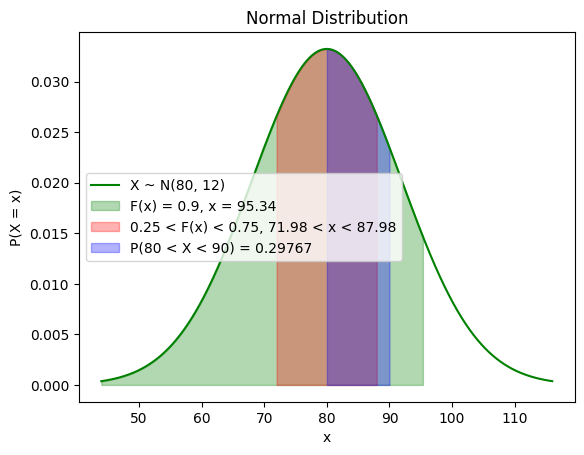

In [7]:
mu = 80
sigma = 12
min_grade = norm_cdf_bs(mu, sigma, 0.9)

x = np.arange(mu - 3 * sigma, mu + 3 * sigma, 0.01)
y = 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(- (x - mu)**2 / (2 * sigma**2))
plt.plot(x, y, color="green", label="X ~ N({}, {})".format(mu, sigma))    
plt.fill_between(x, y, where=(x < min_grade), color='green', alpha=0.3, label="F(x) = 0.9, x = {:.2f}".format(min_grade))

second_fourth_start = norm_cdf_bs(mu, sigma, 0.25)
third_fourth_end = norm_cdf_bs(mu, sigma, 0.75)
plt.fill_between(x, y, where=(x < third_fourth_end) & (x > second_fourth_start), color='red', alpha=0.3, label="0.25 < F(x) < 0.75, {:.2f} < x < {:.2f}".format(second_fourth_start, third_fourth_end))

plt.fill_between(x, y, where=(x < 90) & (x > 80), color='blue', alpha=0.3, label="P(80 < X < 90) = {:.5f}".format(norm.cdf((90 - mu) / sigma) - norm.cdf((80 - mu) / sigma)))

plt.title("Normal Distribution")
plt.xlabel("x")
plt.ylabel("P(X = x)")
plt.legend()
plt.show()

### Results:
| **Q1** | **Q2** | **Q2** |
|--------------|-----------------|-------------------------|
| `x ~= 95.34` | `72 ~< x ~< 88` | `P{80 < X < 90} ~= 0.3` |

## Q3 - Bonus
We'll create 3 samples of size `20_000` and draw their histograms. Then, we'll draw a fourth histograms, showing pmf of their sum:

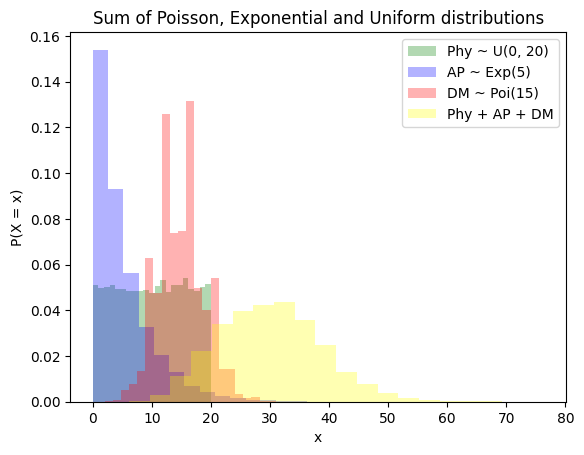

In [8]:
size = 20000

l, r = 0, 20 + 1
physics = np.random.randint(l, r, size)
plt.hist(physics, 21, density=True, color="green", label="Phy ~ U({}, {})".format(l, r - 1), alpha=0.3)

lamb = 5
ap = np.random.exponential(lamb, size=size)
plt.hist(ap, 21, density=True, color="blue", label="AP ~ Exp({})".format(lamb), alpha=0.3)

lamb = 15
dm = np.random.poisson(lamb, size=size)
plt.hist(dm, 21, density=True, color="red", label="DM ~ Poi({})".format(lamb), alpha=0.3)

plt.hist(np.sum([physics, ap, dm], axis=0), 20, density=True, color="yellow", label="Phy + AP + DM", alpha=0.3)

plt.title("Sum of Poisson, Exponential and Uniform distributions")
plt.xlabel("x")
plt.ylabel("P(X = x)")
plt.legend()
plt.show()

No matter what the range of our grades or parameteres that we use in our 3 samples distribution, the result of their sum (yellow histogram) gets closer to normal distributions as we increase the size of our samples. For example, here the expections for 3 samples are:
| Distribution `X` | `E[X]` |
|------------------|--------|
| `Phy ~ U(0, 20)` | 10     |
| `AP ~ Exp(5)`    | 0.2    |
| `DM ~ Pois(15)`  | 15     |

But the result of their sum anyway is a normal distribution.
## Q4
Just like what we did in **Q2** but this time `p` is closer to `0.5`, so normal prediction would be a better and more accurate prediction than poisson prediction. We'll use the same functions We've defined in **Q2**:

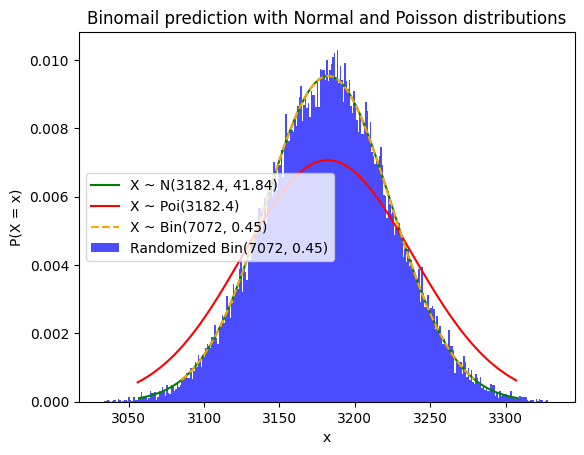

In [9]:
n = 7072
p = 0.45
m = 40000
draw_norm(n * p, math.sqrt(n * p * (1 - p)))
draw_pois(n * p, l = 3056, r = 3308)
draw_bin(n, p)

data = np.random.binomial(n, p, m)
plt.hist(data, bins=np.arange(n * p - 150, n * p + 150) - 0.5, density=True, color='blue', label="Randomized Bin({}, {})".format(n, p), alpha=0.7)

plt.title("Binomail prediction with Normal and Poisson distributions")
plt.xlabel("x")
plt.ylabel("P(X = x)")
plt.legend()
plt.show()

Kourosh Alinaghi, 810101476